## A Simple Tutorial For using QCAD

In [8]:
import os

os.getcwd()

'/home/gyunghun/workspace/QCAD'

In [9]:
from QCAD import Module, QuantumCircuit, execute
from QCAD import TypicalModule as tm

import numpy as np

### 1. Definition of Module
- 이미 정의된 Module을 아래 나열하였습니다. </br> TypicalModule Class를 이용해 사용하시면 됩니다.

- tm.I, tm.H, tm.X, tm.Y, tm.Z, tm.CX, tm.CZ, tm.CCX, tm.CCZ, tm.RX, tm.RY, tm.RZ, tm.U, tm.MCU

- 이미 정의된 모듈을 재사용하여 새로운 모듈을 정의할 수 있습니다. </br> 이때 모듈의 PORT 순서를 변경할 수 있습니다.

In [10]:
rx_half_pi = tm.RX(np.pi/2)

custom_u = tm.U(2, [[-1, 0], [0, 1]])

multi_control_h = tm.MCU(3, [0, 1], tm.H[2])

M = Module('M', 4, [tm.H[0],
                    tm.Z[3],
                    tm.X[2],
                    tm.Y[1],
                    tm.T[1],
                    tm.S[2],
                    tm.I[0]])

N = Module('N', 5, [M[0, 1, 2, 3]])

N.typ_decompose()

([<QCAD.module.Module at 0x7f070a494588>,
 [[0], [3], [2], [1], [1], [2], [0]])

### 2. Quantum Circuit Description using Modules

Quantum Circuit은 사실상 하나의 큰 모듈과 같습니다. </br> 모듈을 정의한 뒤 이를 이용해 QC를 생성합니다.

In [11]:
qc = QuantumCircuit(N)

In [12]:
execute('Cimulator', qc, option='NoPrint')

### 3. Simulation of Quantum Circuit with arbitrary initial state

[-0.35355339059327384j, (8.129419882081727e-18-8.129419882081727e-18j), (-0.25000000000000006+0.25000000000000006j), (-1.1496735851465466e-17+7.703719777548943e-34j), (-0.25000000000000006+0.25000000000000006j), 1.1496735851465466e-17j, (0.35355339059327384-2.7755575615628914e-17j), (8.129419882081727e-18-8.129419882081727e-18j), -0.35355339059327384j, (8.129419882081727e-18-8.129419882081727e-18j), (-0.25000000000000006+0.25000000000000006j), (-1.1496735851465466e-17+7.703719777548943e-34j), (-0.25000000000000006+0.25000000000000006j), 1.1496735851465466e-17j, (0.35355339059327384-2.7755575615628914e-17j), (8.129419882081727e-18-8.129419882081727e-18j)]


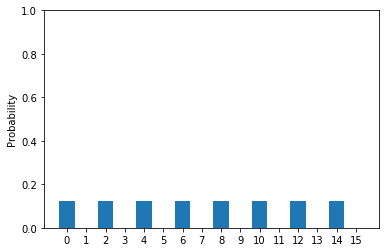

[0j, 0j, (-0.3535533905932738+0.3535533905932738j), (-1.6258839764163454e-17+1.0894704990131558e-33j), 0j, 0j, (0.5000000000000001-3.925231146709437e-17j), (1.1496735851465464e-17-1.1496735851465464e-17j), 0j, 0j, (-0.3535533905932738+0.3535533905932738j), (-1.6258839764163454e-17+1.0894704990131558e-33j), 0j, 0j, (0.5000000000000001-3.925231146709437e-17j), (1.1496735851465464e-17-1.1496735851465464e-17j)]


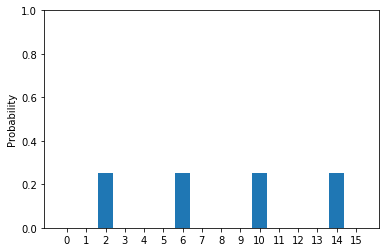

[-0.35355339059327384j, (8.129419882081727e-18-8.129419882081727e-18j), (-0.25000000000000006+0.25000000000000006j), (-1.1496735851465466e-17+7.703719777548943e-34j), (-0.25000000000000006+0.25000000000000006j), 1.1496735851465466e-17j, (0.35355339059327384-2.7755575615628914e-17j), (8.129419882081727e-18-8.129419882081727e-18j), -0.35355339059327384j, (8.129419882081727e-18-8.129419882081727e-18j), (-0.25000000000000006+0.25000000000000006j), (-1.1496735851465466e-17+7.703719777548943e-34j), (-0.25000000000000006+0.25000000000000006j), 1.1496735851465466e-17j, (0.35355339059327384-2.7755575615628914e-17j), (8.129419882081727e-18-8.129419882081727e-18j)]


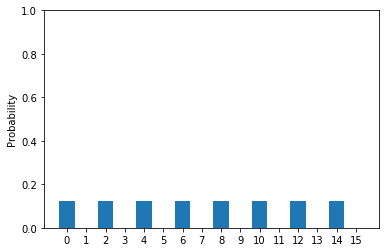

In [12]:
execute('MatrixModel', qc)
execute('MatrixModel', qc, [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0], [1, 0]])
execute('MatrixModel', qc, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])